Notebook prepared by Henrique Lopes Cardoso (hlc@fe.up.pt).

# TEXT CLASSIFICATION

## Original dataset

For text classification, let's make use of a dataset of restaurant reviews, which can be used for a simple sentiment analysis task: each review is either positive (1) or negative (0).

In [1]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


We can start by observing label distribution:

1    500
0    500
Name: Liked, dtype: int64
1    0.5
0    0.5
Name: Liked, dtype: float64


<Axes: >

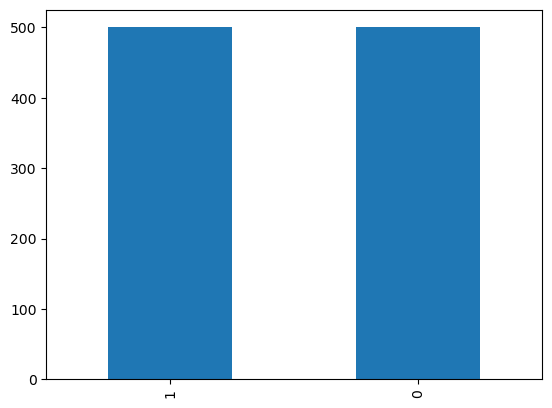

In [2]:
print(dataset['Liked'].value_counts())

print(dataset['Liked'].value_counts(normalize=True))

dataset['Liked'].value_counts().plot(kind='bar')

## Cleanup and normalization

A typical first step when addressing text classification is to apply a few techniques to cleanup and normalize the text.

We can start by quickly inspecting the contents of reviews. Print them all and try finding opportunities for cleanup and normalization operations.

In [3]:
for review in dataset['Review']:
    print(review)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
Now I am getting angry and I want my damn pho.
Honeslty it didn't taste THAT fresh.)
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
The fries were great too.
A great touch.
Service was very prompt.
Would not go back.
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
I was disgusted because I was pretty sure that was human hair.
I was shocked because no signs indicate cash only.
Highly recommended.
Waitress was a little slow in service.
This place is not worth your time, let alone Vegas.
did not like at all.
The Burrittos Blah!
The food, amazing.
Service is also cute.
I could care les

So, you've probably been able to find non-alphabetic characters (including punctuation), capitalized words (sometimes even whole reviews), and so on.

#### Removing non-alphabetic chars

Let's start by removing any non-alpha chars, using a regular expression. We'll create a separate corpus (a list of reviews), so that we leave the original dataset untouched.

In [4]:
import re

corpus = []
for i in range(0, dataset['Review'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # add review to corpus
    corpus.append(review)

print(corpus)

['Wow    Loved this place ', 'Crust is not good ', 'Not tasty and the texture was just nasty ', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it ', 'The selection on the menu was great and so were the prices ', 'Now I am getting angry and I want my damn pho ', 'Honeslty it didn t taste THAT fresh  ', 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ', 'The fries were great too ', 'A great touch ', 'Service was very prompt ', 'Would not go back ', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced ', 'I tried the Cape Cod ravoli  chicken  with cranberry   mmmm ', 'I was disgusted because I was pretty sure that was human hair ', 'I was shocked because no signs indicate cash only ', 'Highly recommended ', 'Waitress was a little slow in service ', 'This place is not worth your time  let alone Vegas ', 'did not like at all ', 'The Burrittos B

#### Lowercasing

We can then apply lowercasing, so that words such as *Amazing*, *AMAZING* and *amazing* all have the same representation.

In [5]:
corpus1 = []
for review in corpus:
    review = review.lower()
    corpus1.append(review)

corpus = corpus1

# Displaying the cleaned and lowercased corpus
corpus[:10]  # Displaying the first 10 reviews for brevity


['wow    loved this place ',
 'crust is not good ',
 'not tasty and the texture was just nasty ',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it ',
 'the selection on the menu was great and so were the prices ',
 'now i am getting angry and i want my damn pho ',
 'honeslty it didn t taste that fresh  ',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ',
 'the fries were great too ',
 'a great touch ']

#### Removing stop words

Another common step which is sometimes applied is to remove any stop words (words that do not have domain semantics attached). We can use the stop words list provided in NLTK for English:

In [6]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\up202001337\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using this stop word list (which does include words that perhaps we should *not* remove, such as negation terms), we can considerably reduce the size of our corpus.

In [7]:
corpus_no_stopwords_manual = []

for review in corpus:
    words = review.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    corpus_no_stopwords_manual.append(' '.join(filtered_words))

# Displaying the first 10 reviews of the manually filtered corpus for brevity
corpus_no_stopwords_manual[:10]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warmer',
 'fries great',
 'great touch']

This technique does not always enable machine learning classifiers to do better, as most of them are quite immune to the presence of stop words (which anyway tend not to be discriminative of the classes at hand). But in any case, removing stop words does reduce the size of the corpus.

Can you check how smaller the corpus has become by removing stop words? (You might need to go back and get the size of the corpus *before* removing stop words, for comparison.)

In [8]:
original_corpus_size = sum(len(review) for review in corpus)
reduced_corpus_size = sum(len(review) for review in corpus_no_stopwords_manual)

# Calculating the reduction in size
reduction_in_size = original_corpus_size - reduced_corpus_size

original_corpus_size, reduced_corpus_size, reduction_in_size

(58315, 35571, 22744)

#### Stemming

Finally, we can apply stemming to further reduce the size of the vocabulary through normalization.

In [9]:
from nltk.stem.porter import PorterStemmer

# Initializing the Porter Stemmer
stemmer = PorterStemmer()

# Applying stemming to each word in each review
corpus_stemmed = []
for review in corpus_no_stopwords_manual:
    words = review.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    corpus_stemmed.append(' '.join(stemmed_words))

# Displaying the first 10 reviews of the stemmed corpus for brevity
corpus_stemmed[:10]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

Can you check how much has the vocabulary been reduced by applying stemming? (You might need to go back one step and get the size of the vocabulary *before* applying stemming, for comparison.)

In [10]:
# Getting the set of unique words from the corpus before and after stemming
unique_words_before_stemming = set(word for review in corpus_no_stopwords_manual for word in review.split())
unique_words_after_stemming = set(word for review in corpus_stemmed for word in review.split())

# Calculating the size of the vocabulary before and after stemming
vocabulary_size_before_stemming = len(unique_words_before_stemming)
vocabulary_size_after_stemming = len(unique_words_after_stemming)

# Calculating the reduction in vocabulary size
reduction_in_vocabulary_size = vocabulary_size_before_stemming - vocabulary_size_after_stemming

vocabulary_size_before_stemming, vocabulary_size_after_stemming, reduction_in_vocabulary_size


(1890, 1565, 325)

#### Doing it all in one step

Of course, instead of applying each of the aforementioned steps one at a time, it would be much more efficient to do it in a single loop. Here's the compact version for employing non-alphabetic filtering, lowercasing, stop word removal, and stemming.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
for i in range(0, dataset['Review'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])
    corpus.append(review)

print(corpus)

#### Wordclouds

A visually appealing way of observing words in a corpus is by showing wordclouds. In order to make a single wordcloud for the whole corpus, we can join all reviews together. We then pass it to [WordCloud](https://amueller.github.io/word_cloud/) to generate a wordcloud: it will automatically assign weights to words based on the number of occurrences of each word.

In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


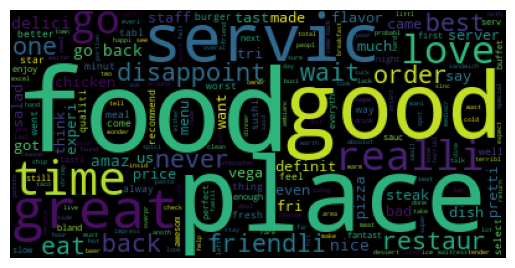

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(corpus_stemmed))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

It would also be interesting to visualize a wordcloud for each of the classes. Can you do it?

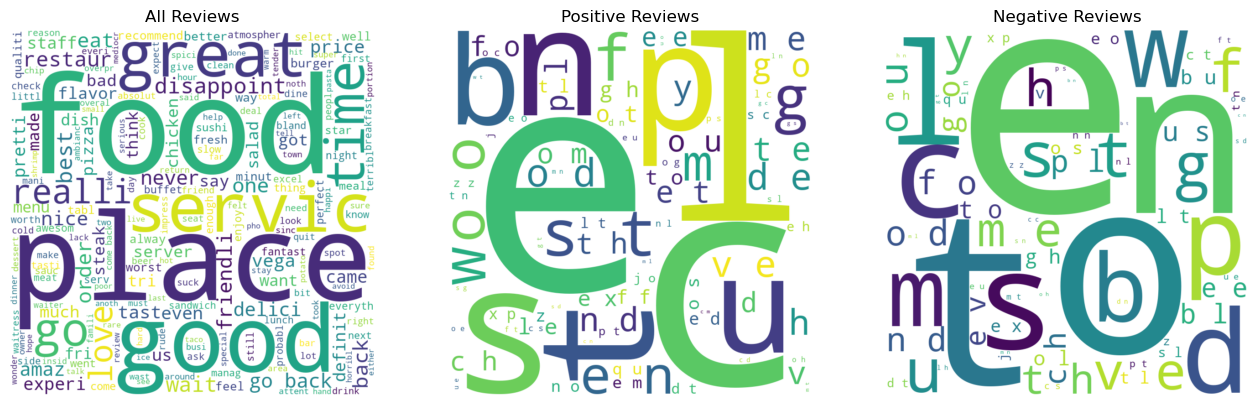

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating a word cloud for the entire stemmed corpus
wordcloud_all = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(" ".join(corpus_stemmed))

# Splitting the stemmed corpus into positive and negative based on 'Liked' column
corpus_stemmed_positive = [" ".join(corpus_stemmed[i]) for i in range(len(corpus_stemmed)) if dataset['Liked'][i] == 1]
corpus_stemmed_negative = [" ".join(corpus_stemmed[i]) for i in range(len(corpus_stemmed)) if dataset['Liked'][i] == 0]

# Generating word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(" ".join(corpus_stemmed_positive))

wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(" ".join(corpus_stemmed_negative))

# Plotting the word clouds
plt.figure(figsize=(16, 8))

# Wordcloud for all reviews
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.title('All Reviews')
plt.axis('off')

# Wordcloud for positive reviews
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title('Positive Reviews')
plt.axis('off')

# Wordcloud for negative reviews
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


## Generating a data set

We need to transform the data in the reduced-vocabulary corpus into a dataset that can be handled by machine learning models. Each review in our corpus is still rather unstructured: it is simply a lists of tokens. We will transform each review into a representation that makes use of the same set of features for the whole dataset.

#### Obtaining features from the Bag-of-Words model

The simplest way to do it is to create a *bag-of-words* model, which ignores word sequence.

We can use scikit-learn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which converts a collection of text documents to a matrix of token counts.


In [24]:
!pip show scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_stemmed).toarray()

print(X.shape)

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Programs\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, pingouin, scikit-learn-intelex
(1000, 1565)


By using CountVectorizer, we can limit the number of features by using the *max_features* parameter.

Let's look at the features we've got:

In [25]:
print(vectorizer.get_feature_names_out())

['absolut' 'absolutley' 'accid' ... 'yum' 'yummi' 'zero']


Each review is now represented as a vector with the number of occurrences for each of the features, indicating how many times the corresponding token appears in the review. Each vector is very sparse.

Compare the contents of the 124th review with its representation vector following the bag-of-words model.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting the CountVectorizer to the stemmed corpus and transforming the corpus into a bag-of-words model
X = vectorizer.fit_transform(corpus_stemmed).toarray()

# Getting the shape of the transformed matrix
matrix_shape = X.shape

# Getting the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Displaying the 124th review and its vector representation
review_124 = corpus_stemmed[123]  # Indexing starts at 0
vector_124 = X[123]  # Corresponding vector representation

matrix_shape, feature_names[:10], review_124, vector_124[:10]  # Displaying first 10 features for brevity


((1000, 1565),
 array(['absolut', 'absolutley', 'accid', 'accommod', 'accomod',
        'accordingli', 'account', 'ach', 'acknowledg', 'across'],
       dtype=object),
 'guy steak steak love son steak best worst place said best steak ever eaten',
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

#### Obtaining the classes

We can get the target labels from the second column in our original dataset, after which we have the full table of data on which we can train machine learning algorithms that are able to classify restaurant reviews into either positive or negative.

In [29]:
y = dataset['Liked']

print(X.shape, y.shape)

(1000, 1565) (1000,)


## Training classifiers

To train machine learning classifiers, we first split the data into training and test sets.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nLabel distribution in the training set:")
print(y_train.value_counts())

print("\nLabel distribution in the test set:")
print(y_test.value_counts())

(800, 1565) (800,)
(200, 1565) (200,)

Label distribution in the training set:
1    401
0    399
Name: Liked, dtype: int64

Label distribution in the test set:
0    101
1     99
Name: Liked, dtype: int64


Every time you perform the train-test split, you get slightly different results in terms of class distribution. To avoid it, you can use the *random_state* parameter for *train_test_split* (e.g. *random_state = 0*), which ensures you always get the same exact split.

You can also force a stratified split via parameter *stratify*, which ensures the same label distribution for both the training and test sets (*stratify=y*).

#### Naive Bayes

We can start by trying out fitting a [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) classifier to our training data. For text data, the two most effective variants are [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html).

In [31]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

Let's see the model's output on the test set:

In [32]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0]


We can assess the performance of the model by looking at different metrics.

We can print the *confusion matrix*, and get scores for *accuracy*, *precision*, *recall*, and *f1*. Since our dataset is perfectly balanced, accuracy will be a fairly good indicator of performance.

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# confusion matrix
# print(confusion_matrix(y_test, y_pred))

# accuracy, precision, recall, f1
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall, f1


(array([[68, 33],
        [14, 85]], dtype=int64),
 0.765,
 0.7203389830508474,
 0.8585858585858586,
 0.7834101382488479)

Let's do a test on a review obtained from the user. We ask the user for input, preprocess the inserted review by removing non-alphabetic characters and by applying lowercasing and stemming

We then vectorize the review using the same vectorizer we've used before for creating the dataset. Note that we do not need to remove stop words, as these will be ignored by the vectorizer, since they do not show up in the feature set used to represent reviews.

In [35]:
import os

rev = input("Enter review: ")

# Remove non-alpha chars and apply lowercasing
rev_cleaned = re.sub('[^a-zA-Z]', ' ', rev).lower()

# Split into tokens and apply stemming
rev_stemmed = ' '.join([stemmer.stem(word) for word in rev_cleaned.split()])



# vectorize the review
V = vectorizer.transform([rev_stemmed]).toarray()

print(rev_stemmed)
print(V.shape)
print(V)

if(clf.predict(V) == [1]):
    print('positive review (+)')
else:
    print('negative review (-)')

Enter review:  this place wah bad


thi place wah bad
(1, 1565)
[[0 0 0 ... 0 0 0]]
negative review (-)


Many classifiers also provide probabilities for each possible class when making predictions. We can get them by using *predict_proba* instead of *predict*:

In [36]:
print(clf.predict(V))
print(clf.predict_proba(V))

[0]
[[0.94222511 0.05777489]]


#### Other classifiers

Try out using other classifiers, such as:
- *Logistic Regression*, through scikit-learn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.
- *Decision Tree*, through scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class. This model always assigns a probability of 1 to one of the classes.
- *Random Forest*, through scikit-learn's [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class.
- *Support Vector Machines (SVM)*, through scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class. The SVM model also allows you to get probabilities, but for that you need to use the *probability=True* parameter setting in its constructor.
- *Perceptron*, through scikit-learn's [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) class. This model does not allow you to get probabilities.
- *eXtreme Gradient Boosting*, through [XGBoost](https://xgboost.readthedocs.io/en/stable/).

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

# Initializing classifiers
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
svc = SVC(probability=True)
perceptron = Perceptron()

# Fitting classifiers
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
perceptron.fit(X_train, y_train)

# Predicting with Logistic Regression
print("Logistic Regression Predictions:")
print(log_reg.predict(V))
print(log_reg.predict_proba(V))

# Decision Tree does not support predict_proba in a way that gives a meaningful probability distribution across all classes
# So, showing only the prediction
print("\nDecision Tree Prediction:")
print(dec_tree.predict(V))

# Random Forest Predictions
print("\nRandom Forest Predictions:")
print(rand_forest.predict(V))
print(rand_forest.predict_proba(V))

# SVM Predictions
print("\nSVM Predictions:")
print(svc.predict(V))
print(svc.predict_proba(V))

# Perceptron does not support predict_proba
print("\nPerceptron Prediction:")
print(perceptron.predict(V))


Logistic Regression Predictions:
[0]
[[0.83806827 0.16193173]]

Decision Tree Prediction:
[1]

Random Forest Predictions:
[0]
[[0.83 0.17]]

SVM Predictions:
[0]
[[0.94672104 0.05327896]]

Perceptron Prediction:
[0]


#### Cross-validation

When addressing datasets that are not big enough, cross-validation allows us to use the whole dataset for both training and testing, by splitting the data into *k* folds. By training the model *k* times, each time using *k-1* folds and testing in the remaining fold, we can get performance scores for the model that are averaged accross the *k* iterations.

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = SVC()
scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.68 0.74 0.74 0.81 0.74 0.83 0.84 0.82 0.77 0.84]
0.78 accuracy with a standard deviation of 0.05


The [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) class allows greated flexibility in terms of the metrics we can get, and also provides train scores, fit times and score times.

In [39]:
from sklearn.model_selection import cross_validate

scores = cross_validate(clf, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=True)
scores

{'fit_time': array([0.26739979, 0.325629  , 0.2628324 , 0.26266646, 0.36656976]),
 'score_time': array([0.1229074 , 0.16488504, 0.11890841, 0.11896491, 0.14912271]),
 'test_accuracy': array([0.73 , 0.775, 0.745, 0.825, 0.775]),
 'train_accuracy': array([0.9675 , 0.9575 , 0.9675 , 0.96125, 0.965  ]),
 'test_precision_macro': array([0.73770153, 0.79662388, 0.76749645, 0.82898067, 0.78318402]),
 'train_precision_macro': array([0.9682492 , 0.95823317, 0.96779237, 0.96208464, 0.96557032]),
 'test_recall_macro': array([0.73 , 0.775, 0.745, 0.825, 0.775]),
 'train_recall_macro': array([0.9675 , 0.9575 , 0.9675 , 0.96125, 0.965  ]),
 'test_f1_macro': array([0.72779514, 0.77082325, 0.73952348, 0.82446902, 0.77336254]),
 'train_f1_macro': array([0.96748699, 0.95748299, 0.96749492, 0.96123249, 0.96498928])}

## Beyond bag-of-words

We can use other forms of representing the text in our dataset. For instance, we can compute the occurrence of words in a different way. And we can consider features beyond simple words.

#### 1-hot vectors

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) includes a parameter (*binary*) that allows us to represent each review as a 1-hot vector with a 0 or a 1 for each of the features, indicating whether the corresponding token appears in the review.

Can you try it out? Compare the previous representation vector of the 124th review with its 1-hot representation vector.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Re-initializing the CountVectorizer with binary=True for 1-hot encoding
vectorizer_1hot = CountVectorizer(binary=True)
X_1hot = vectorizer_1hot.fit_transform(corpus_stemmed).toarray()

# Extracting the 1-hot representation vector for the 124th review
vector_124_1hot = X_1hot[123]

# Re-displaying the original bag-of-words representation for comparison
vector_124_bow = X[123]

vector_124_bow[:10], vector_124_1hot[:10]  # Displaying the first 10 features for comparison


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

#### TF-IDF

We can adjust the counts of each word in a document by considering how many times it occurs in the document (its *term frequency TF*) and in how many documents it occurs (its *document frequency DF*). [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) provides a way to directly obtain TF-IDF weighted features: the term frequency of a word is multiplied by its *inverse* document frequency.

Can you try it out? Compare the previous representation vector of the 124th review with its TF-IDF representation vector.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus_stemmed).toarray()

# Extracting the TF-IDF representation vector for the 124th review
vector_124_tfidf = X_tfidf[123]

vector_124_tfidf[:100]  # Displaying the first 10 features for comparison


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Using TF-IDF weighing gives us a particularly interesting perspective on wordcloud visualizations. For that, we sum directly the values for each feature in the samples we want, and pass these values to [WordCloud](https://amueller.github.io/word_cloud/) as a python dict (containing each word and its frequency) using [generate_from_frequencies](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). Can you do it?

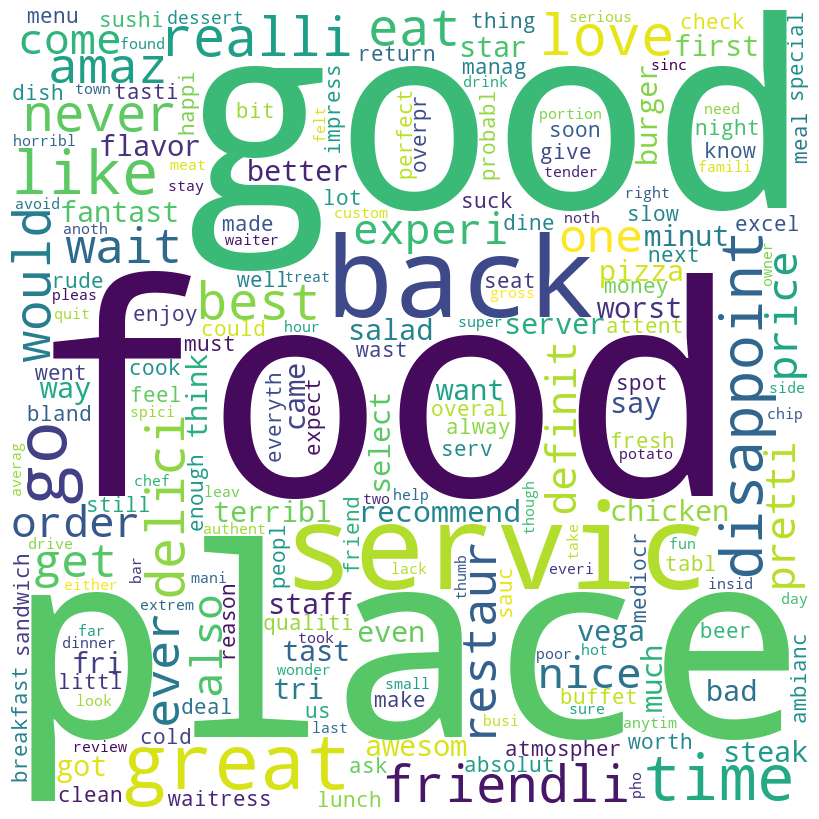

In [43]:
from collections import defaultdict

# Summing the TF-IDF values for each feature across all samples
tfidf_sums = defaultdict(float)
feature_names = tfidf_vectorizer.get_feature_names_out()
for i in range(X_tfidf.shape[0]):
    for j in range(X_tfidf.shape[1]):
        tfidf_sums[feature_names[j]] += X_tfidf[i][j]

# Generating a word cloud from TF-IDF frequencies
wordcloud_tfidf = WordCloud(width = 800, height = 800, 
                            background_color ='white', 
                            min_font_size = 10).generate_from_frequencies(tfidf_sums)

# Displaying the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


#### N-grams

The bag-of-words model is very simplistic and ignores word order. Perhaps we can do better if we make use of a bi-gram representation: generate features corresponding to pairs of consecutive tokens. Hopefully, in some cases we will be able to distinguish negations, such as in *not expensive* vs *expensive*.

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) (and also [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) includes the *ngram_range* parameter, which we can use to define the range of n-grams we want to generate as features. If we use a range (1,2), for instance, we'll get both individual tokens as well as bi-grams. Perhaps when doing so it will be a good idea not to get rid of stop words, since the stop word list we have used before includes negation tokens.

Can you try it out?

In [44]:
# Initializing the CountVectorizer with ngram_range=(1,2) to include both unigrams and bigrams
vectorizer_bigram = CountVectorizer(ngram_range=(1,2))
X_bigram = vectorizer_bigram.fit_transform(corpus_stemmed).toarray()

# Getting the shape of the matrix and a sample of feature names to see the bigrams
bigram_shape = X_bigram.shape
sample_feature_names_bigram = vectorizer_bigram.get_feature_names_out()[1000:1010]  # Sample feature names for illustration

bigram_shape, sample_feature_names_bigram


((1000, 5634),
 array(['coupl', 'coupl drink', 'coupl month', 'coupl small', 'coupl year',
        'coupon', 'cours', 'cours back', 'cours high', 'cours none'],
       dtype=object))